# Are small College Towns all the same?

### An exploratory data analysis is applied to a set of twenty-five college towns to identify key similarities and differences. 
### The set of towns was chosen from a recent "Best College Towns & Cities in America" report by wallethub.com.
### A visit to each college web site and some other online searches produced some basic attributes for each college town. This data was manually entered into Excel and a csv file was produced to start the analysis.


In [2]:
# Setup the environment
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Get the list of college towns in a dataframe
town_df = pd.read_csv('C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/CollegeTown.csv')
town_df.head(25)

,rank,town,college name,latitude,longitude,total,undergraduate,graduate,avg rain,avg snow,sunny days,avg jan temp,avg jul temp,elevation
0,1,"Ann Arbor, MI",University of Michigan,42.2808,-83.7303,48090,31266,16824,36.0,43.0,178,16.5,82.8,879
1,2,"Provo, UT",Brigham Young University (UT),40.2486,-111.6493,33511,30745,2766,17.7,42.7,222,21.1,92.8,4550
2,3,"Rexburg, ID",Brigham Young University (ID),43.8142,-111.7830,34000,34000,0,13.6,41.8,206,12.4,83.8,4865
3,4,"Charleston, IL",Eastern Illinois University,39.4844,-88.1751,7415,6012,1403,40.3,15.1,202,20.2,86.2,673
4,5,"Stevens Point, WI",University of Wisconsin,44.5234,-89.5689,7725,7385,340,32.2,45.2,187,6.6,81.6,1089
5,6,"West Lafayette, IN",Purdue University,40.4282,-86.9144,44474,33735,10739,37.9,18.9,185,16.9,86.4,610
6,7,"Charlottesville, VA",University of Virginia,38.0311,-78.4986,25865,24639,1226,45.3,14.5,219,25.8,85.7,466
7,8,"Orem, UT",Utah Valley University,40.2788,-111.7144,39931,39397,534,17.7,42.4,223,21.0,92.1,4774
8,9,"Cambridge, MA",MIT,42.3602,-71.0937,11520,4530,6990,48.0,50.0,201,19.2,82.3,16
9,10,"Santa Barbara, CA",UC Santa Barbara,34.4138,-119.8501,26314,23349,2965,18.5,0.0,283,43.1,73.1,49


In [8]:
# First let's visualize geographically where our college towns are in the country
import folium # map rendering library

# Center of US latitude and longitude values
latitude = 31.51073
longitude = -96.4247

# create map
us_map = folium.Map(location=[latitude, longitude], zoom_start=4, height=1000)

count = 0
for lat, lng, label in zip(town_df.latitude, town_df.longitude, town_df.town):
    count = count + 1
    if count < 800:
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup='',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(us_map)

# display map
us_map


### Looking beyond geographic location
#### To understand the college experience, our first attempt is to examing the obvious characteristics of a place, namely the size of the student body and the weather. We can see just by review of the data that there are variations in temperature, days of sunshine and precipitation.
#### Our first attempt clustered on all numeric attributes in the data set with the exclusion of rank, latitude and longitude. We chose hierarchical clustering as we don't need to specify a cluster size. This is a good first step because it is easy to visualize the relationships between the college towns. The first attempt (analysis not provided) identified that the set of attributes used to cluster was overly complex and hid the key classifications required. 

#### Most students are away from these towns in the summer so we dropped the avg july temp from the set of attributes. The graduate and undergraduate attributes were also dropped because they sum to the total and are redundant. The elevation also did not provide any significant clustering value and was dropped. There is also a relationship between avg snow and avg jan temp. We decided to convert avg snow to the rain equivalent (1 inch rain = 10 inces of snow) and collapse into a single avg precipitation measure.

#### The hierarchical clustering results are presented below

In [25]:
# Perform a hierarchical cluster analysis based on basic college town attributes; weather related attributes and
# student population

# remove attributes that are not relevant to clustering
df = town_df.drop(['rank','town','college name','latitude','longitude','avg jul temp','undergraduate','graduate','elevation'], axis=1)

# calculate avg precip and then drop avg rain and avg snow
df['avg precip'] = df['avg rain'] + (df['avg snow'] / 10.0)
df = df.drop(['avg rain','avg snow'], axis=1)

# Scale the dataset
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

import scipy
import pylab
import scipy.cluster.hierarchy as hierarchy

leng = cluster_dataset.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(cluster_dataset[i], cluster_dataset[j])
        
Z = hierarchy.linkage(D, 'complete')

C:\Users\kjones\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


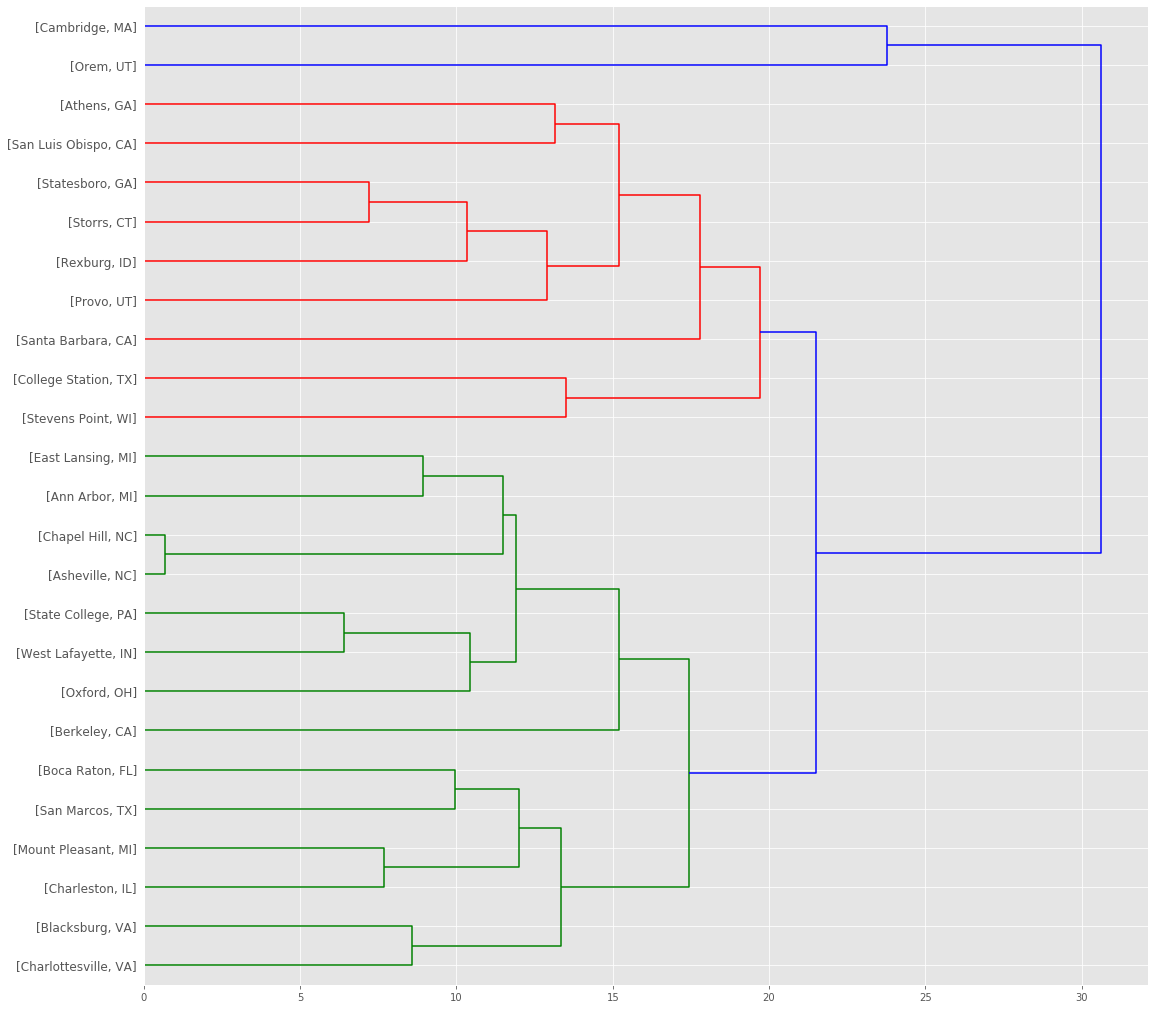

In [26]:
# Visualize using dendrogram
fig = pylab.figure(figsize=(18,18))
def llf(id):
    return '[%s]' % (town_df['town'][id])
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [37]:
# A visual examination of the dendogram shows two obvious high level clusters which represent above freezing
# and near freezing or below but as we go to lower levels we can see there are other clusters

# Based on some other executions with different cluster counts, we settled on sklearn agglomerative clustering with 6 clusters
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(cluster_dataset)
agglom.labels_

# Assign the labels to the hierarchy cluster attribute
df['hierarchy cluster'] = agglom.labels_
df.head()

,total,sunny days,avg jan temp,avg precip,hierarchy cluster
0,48090,178,16.5,40.30,0
1,33511,222,21.1,21.97,3
2,34000,206,12.4,17.78,3
3,7415,202,20.2,41.81,1
4,7725,187,6.6,36.72,0


In [38]:
# Now we examine the mean values for our clustering attributes to get an understanding of
# what each cluster represents
df.groupby('hierarchy cluster').mean()

,total,sunny days,avg jan temp,avg precip
hierarchy cluster,,,,
0,30891.111111,182.666667,15.666667,43.074444
1,27614.571429,213.428571,27.085714,45.325714
2,53826.000000,220.500000,38.850000,37.655000
3,35814.000000,217.000000,18.166667,20.563333
4,30209.000000,275.333333,43.166667,21.333333
5,29772.000000,231.000000,57.800000,60.000000


### Clustering results
#### After a review of these clusters, we can see the following clusters
#### 0 = Medium size, cloudy, cold and wet
#### 1 = Medium size, sunny, cold and wet
#### 2 = Large, sunny, temperate and wet
#### 3 = Medium size, sunny, cold and dry
#### 4 = Medium size, super sunny, temperate and dry
#### 5 = Medium size, sunny, hot and wet

In [40]:
# Let's also use kMeans clustering and compare the results with agglomerative clustering
from sklearn.cluster import KMeans

num_clusters = 6

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
df["kMeans Labels"] = labels
df.head(25)


,total,sunny days,avg jan temp,avg precip,hierarchy cluster,kMeans Labels
0,48090,178,16.5,40.30,0,0
1,33511,222,21.1,21.97,3,5
2,34000,206,12.4,17.78,3,5
3,7415,202,20.2,41.81,1,2
4,7725,187,6.6,36.72,0,0
5,44474,185,16.9,39.79,0,0
6,25865,219,25.8,46.75,1,2
7,39931,223,21.0,21.94,3,5
8,11520,201,19.2,53.00,0,2
9,26314,283,43.1,18.50,4,1


#### The kMeans clustering largely matches the hiearchical approach. Given the small number of college towns and the small number of clustering attributes, this is not surprising.
#### Note: There is a mapping between the hierarchy and kMeans labels, 0->0, 3->5, 4->1 etc.

### Looking beyond basic attributes
#### Our next step in this analysis is to examine the businesses that students can walk to from campus. Foursquare venue data was collected for each college. The limit was a one mile radius and no more than 100 venues. The raw data collected for each college town was first saved to a single file per college town. The primary reason for this approach was to maintain a static set of data. As the foursquare data is constantly changing, we wanted a point in time view of the venue data.

In [41]:
# Setup the credentials

CLIENT_ID = 'R0CMJOAHR42TKEYFMLD35WBRDVOFR0JYDDZQ3L0LVJJ5V5L5' # your Foursquare ID
CLIENT_SECRET = 'CYJO243JUTV0BY0ZAX0ZMHE5XFN5OMGARUWVZAXQW3CDCL4U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1600 # define radius in meters (1600m = 1mile)

# Iterate through the list of college towns to get the foursquare data and persist to file
# one file per college town
for row_index,row in town_df.iterrows():
    town = row['town']
    latitude = row['latitude']
    longitude = row['longitude']

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)

    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues_df = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues_df = nearby_venues_df.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues_df['venue.categories'] = nearby_venues_df.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues_df.columns = [col.split(".")[-1] for col in nearby_venues_df.columns]
    
    nearby_venues_df['town'] = town
    town_col = nearby_venues_df.pop('town')
    nearby_venues_df.insert(0, 'town', town_col)

    filename = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Data/' + town + '.csv'
    nearby_venues_df.to_csv(filename,index=False)

#### After an initial review of the venue data it became clear that the categories provided by foursquare were too specific and it would be necessary to generalize the categories to perform meaningful analysis. The complete set of categories for all towns was consolidated and then grouped to get counts by category. This set was exported to file and reviewed.

In [4]:
import os

# Let's see what the categories of venues look like by count

# The venue data for each college town is stored in this folder
folderpath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Data'

# read the individual files and create a dataframe with only the categories
all_categories = []
for entry in os.scandir(folderpath):
    if entry.is_file():
        filepath = entry.path
        filepath = filepath.replace("\\","/")
        next_college_town_df = pd.read_csv(filepath)
        all_categories = all_categories + next_college_town_df['categories'].to_list()

college_categories_df = pd.DataFrame(all_categories) 
college_categories_df.columns = ['categories']

# get the counts by category
category_count = college_categories_df.groupby(['categories']).size()
category_count_df = pd.DataFrame(category_count)
category_count_df.columns = ['count']
category_count_df.sort_values(by='count',inplace=True,ascending=False)
print(category_count_df)




                                          count
categories                                     
Pizza Place                                  96
Sandwich Place                               84
Coffee Shop                                  79
Bar                                          73
American Restaurant                          57
Mexican Restaurant                           52
Ice Cream Shop                               48
Hotel                                        44
Fast Food Restaurant                         36
Café                                         31
Burger Joint                                 30
Chinese Restaurant                           27
Bakery                                       26
Park                                         25
Brewery                                      21
Breakfast Spot                               20
Bookstore                                    19
Grocery Store                                18
Asian Restaurant                        

In [25]:
# The original set is 271 distinct categories
# To perform a generalization of these categories, the category count dataframe was written to file
# and manually updated using Excel, the file was reloaded with the new attributes
# category1, category2, outdoor

filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Category.csv'
category_count_df.to_csv(filepath)

In [5]:
# After manual update to the Category.csv file we reload it for later use
filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/CategoryExtended.csv'
category_df = pd.read_csv(filepath)
category_df.head(25)

,categories,count,category1,category2,outdoor
0,Music Venue,12,Arts Venue,Entertainment,0
1,Concert Hall,7,Arts Venue,Entertainment,0
2,Performing Arts Venue,6,Arts Venue,Entertainment,0
3,College Arts Building,5,Arts Venue,Entertainment,0
4,Museum,5,Arts Venue,Entertainment,0
5,Art Gallery,4,Arts Venue,Entertainment,0
6,Planetarium,3,Arts Venue,Entertainment,0
7,Outdoor Sculpture,3,Arts Venue,Entertainment,1
8,College Theater,3,Arts Venue,Entertainment,0
9,Jazz Club,2,Arts Venue,Entertainment,0


#### Our three new attributes are Category1, Category2 and Outdoor. Category1 is a generalization of the Foursquare category and generalizes the 271 Foursquare categories to 20 categories. For example, Pizza Place, Burger Join, Diner are mapped to Casual Dining. Category2 is an even higher generalization to only 6 categories. Outdoor indicates whether or not the venue is considered indoor or outdoor.
#### Note: Some Foursqure categories were excluded as they were considered infrastructure, e.g. Bank, ATM, Gas Station.

In [6]:
import os

# To continue our analysis, we load each college town foursquare data and associate the new attributes we
# created previously
count = 0
for entry in os.scandir(folderpath):
    if entry.is_file():
        filepath = entry.path
        filepath = filepath.replace("\\","/")
        next_college_town_df = pd.read_csv(filepath)
        if count == 0:
            college_town_df = next_college_town_df
            count = count + 1
        else:
            frames = [college_town_df,next_college_town_df]
            college_town_df = pd.concat(frames, sort=False)   

college_town_df = college_town_df.merge(category_df, on='categories')

college_town_df.head(10)

# drop the exclude category
college_town_df.drop(college_town_df[college_town_df.category1 == 'Exclude'].index, inplace=True)

In [7]:
# Summarize the counts by town and category1
category1_count = college_town_df.groupby(['town','category1']).size()
category1_count_df = pd.DataFrame(category1_count)
category1_count_df.columns = ['count']

summary_df = pd.pivot_table(category1_count_df, values='count', columns='category1', index='town', fill_value=0)
summary_df.head(25)
#filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Category1.csv'
#summary_df.to_csv(filepath)

category1,Arts Venue,Casual Dining,Coffee,Dessert,Dining,Drinking Venue,Fast Food,Grocery,Gym,Ice Cream,International Dining,Museum,Nature,Other Venue,Pool,Retail,Sporting-Leisure,Vegetarian Dining,Yoga Studio
town,,,,,,,,,,,,,,,,,,,
"Ann Arbor, MI",7,16,6,1,15,10,0,4,1,3,12,1,3,2,1,10,0,2,0
"Asheville, NC",4,15,4,1,10,13,0,0,1,2,10,2,3,4,0,4,2,0,1
"Athens, GA",2,14,3,1,8,2,0,1,2,1,2,1,5,0,0,5,5,0,0
"Berkeley, CA",11,18,3,2,12,4,0,4,1,4,15,1,3,1,1,10,1,1,2
"Blacksburg, VA",2,18,5,2,17,10,1,5,3,1,9,1,1,2,0,8,2,1,0
"Boca Raton, FL",3,15,4,2,11,4,3,6,4,1,7,1,0,3,0,9,1,0,0
"Cambridge, MA",2,7,2,0,16,9,0,7,3,2,17,1,5,4,0,9,6,4,1
"Chapel Hill, NC",4,15,4,1,10,13,0,0,1,2,10,2,3,4,0,4,2,0,1
"Charleston, IL",0,12,2,1,8,9,4,4,0,1,1,0,0,2,0,7,0,0,0


In [8]:
# Summarize the counts by town and category2
category2_count = college_town_df.groupby(['town','category2']).size()
category2_count_df = pd.DataFrame(category2_count)
category2_count_df.columns = ['count']

summary_df = pd.pivot_table(category2_count_df, values='count', columns='category2', index='town', fill_value=0)
summary_df.head(25)
#filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Category2.csv'
#summary_df.to_csv(filepath)

category2,Entertainment,Exercise,Food,Nature,Retail
town,,,,,
"Ann Arbor, MI",20,2,59,3,10
"Asheville, NC",23,4,42,3,4
"Athens, GA",5,7,30,5,5
"Berkeley, CA",17,5,59,3,10
"Blacksburg, VA",15,5,59,1,8
"Boca Raton, FL",11,5,49,0,9
"Cambridge, MA",16,10,55,5,9
"Chapel Hill, NC",23,4,42,3,4
"Charleston, IL",11,0,33,0,7


In [9]:
# Summarize the counts by town and outdoor
outdoor_count = college_town_df.groupby(['town','outdoor']).size()
outdoor_count_df = pd.DataFrame(outdoor_count)
outdoor_count_df.columns = ['count']

summary_df = pd.pivot_table(outdoor_count_df, values='count', columns='outdoor', index='town', fill_value=0)
summary_df.head(25)
#filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Outdoor.csv'
#summary_df.to_csv(filepath)

outdoor,0,1
town,,
"Ann Arbor, MI",90,4
"Asheville, NC",73,3
"Athens, GA",45,7
"Berkeley, CA",89,5
"Blacksburg, VA",85,3
"Boca Raton, FL",73,1
"Cambridge, MA",86,9
"Chapel Hill, NC",73,3
"Charleston, IL",51,0


#### After a review of the results, the first metrics we decided to use in our final analysis were the category2 % of total for each college town. These metrics provide a high level understanding of the business offering profile for the town.

In [10]:
summary_df = pd.pivot_table(category2_count_df, values='count', columns='category2', index='town', fill_value=0)

# calculate the new metrics
summary_df['Total'] = summary_df['Entertainment'] + summary_df['Exercise'] + summary_df['Food'] + summary_df['Nature'] + summary_df['Retail']
summary_df['Entertainment Metric'] = summary_df['Entertainment'] / summary_df['Total']
summary_df['Exercise Metric'] = summary_df['Exercise'] / summary_df['Total']
summary_df['Food Metric'] = summary_df['Food'] / summary_df['Total']
summary_df['Nature Metric'] = summary_df['Nature'] / summary_df['Total']
summary_df['Retail Metric'] = summary_df['Retail'] / summary_df['Total']

# Apply metrics to our college town dataframe
town_df = town_df.merge(summary_df[['Entertainment','Food','Entertainment Metric','Exercise Metric','Food Metric','Nature Metric','Retail Metric']], on='town')

In [11]:
# Get a high level understanding of the distribution of each metric
town_df[['Entertainment Metric','Exercise Metric','Food Metric','Nature Metric','Retail Metric']].describe()

,Entertainment Metric,Exercise Metric,Food Metric,Nature Metric,Retail Metric
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.174128,0.053437,0.639602,0.037587,0.095246
std,0.086446,0.031065,0.102999,0.025566,0.063988
min,0.062500,0.000000,0.396825,0.000000,0.000000
25%,0.116667,0.032258,0.576923,0.023529,0.052632
50%,0.148649,0.052632,0.648148,0.033333,0.096154
75%,0.215054,0.067797,0.716667,0.044444,0.119048
max,0.365079,0.134615,0.796875,0.100000,0.344828


Matplotlib version:  3.1.1


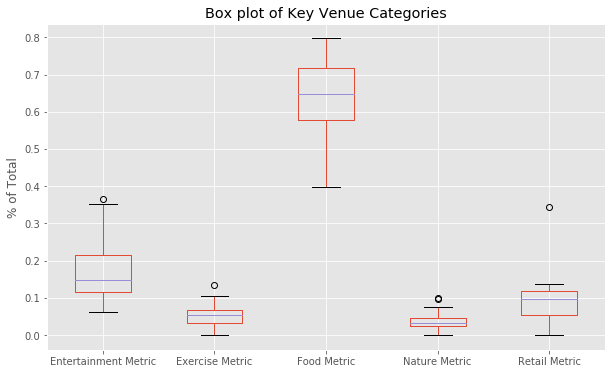

In [27]:
# Then visualize the distributions
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

town_df[['Entertainment Metric','Exercise Metric','Food Metric','Nature Metric','Retail Metric']].plot(kind='box', figsize=(10, 6))
plt.title('Box plot of Key Venue Categories')
plt.ylabel('% of Total')
plt.show()

### The obvious takeaway is that Food and Entertainment are the most common venues in college towns; not surprising, students have to eat and like to play after a hard day learning (or not!)
#### Looking at only these two metrics, lets visualize these two metrics in a scatterplot 

Matplotlib version:  3.1.1


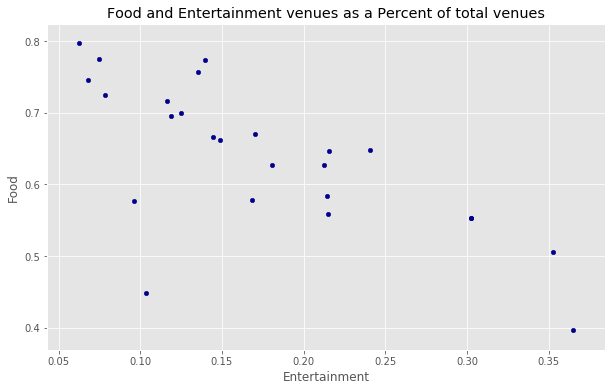

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

town_df.plot(kind='scatter', x='Entertainment Metric', y='Food Metric', figsize=(10, 6), color='darkblue')

plt.title('Food and Entertainment venues as a Percent of total venues')
plt.xlabel('Entertainment')
plt.ylabel('Food')

plt.show()

### There is no obvious clustering here so let's continue on with our analysis. 

#### While it is possible there are some interesting insignts in the other categories, we are going to ignore them in our analysis and focus instead on Food and Entertainment. We want to understand the types of offerings in these two categories in each town.

In [14]:
summary_df = pd.pivot_table(category1_count_df, values='count', columns='category1', index='town', fill_value=0)

# Apply metrics to our college town dataframe
# Include only entertainment and food counts
town_df = town_df.merge(summary_df[['Arts Venue','Drinking Venue','Other Venue','Museum','Grocery','Casual Dining','Coffee','Dessert','Dining','Fast Food','Ice Cream','International Dining','Vegetarian Dining']], on='town')

# calculate new metrics
town_df['Arts Venue Metric'] = town_df['Arts Venue'] / town_df['Entertainment']
town_df['Drinking Venue Metric'] = town_df['Drinking Venue'] / town_df['Entertainment']
town_df['Other Venue Metric'] = town_df['Other Venue'] / town_df['Entertainment']
town_df['Museum Metric'] = town_df['Museum'] / town_df['Entertainment']

town_df['Grocery Metric'] = town_df['Grocery'] / town_df['Food']
town_df['Casual Dining Metric'] = town_df['Casual Dining'] / town_df['Food']
town_df['Coffee Metric'] = town_df['Coffee'] / town_df['Food']
town_df['Dessert Metric'] = town_df['Dessert'] / town_df['Food']
town_df['Dining Metric'] = town_df['Dining'] / town_df['Food']
town_df['Fast Food Metric'] = town_df['Fast Food'] / town_df['Food']
town_df['Ice Cream Metric'] = town_df['Ice Cream'] / town_df['Food']
town_df['Internationl Dining Metric'] = town_df['International Dining'] / town_df['Food']
town_df['Vegetarian Dining Metric'] = town_df['Vegetarian Dining'] / town_df['Food']

In [28]:
filepath = 'C:/Redstem LLC/Dev/IBM-Data-Science-Capstone/Town.csv'
town_df.to_csv(filepath)

In [15]:
town_df.head(25)

,rank,town,college name,latitude,longitude,total,undergraduate,graduate,avg rain,avg snow,sunny days,avg jan temp,avg jul temp,elevation,Entertainment,Food,Entertainment Metric,Exercise Metric,Food Metric,Nature Metric,Retail Metric,Arts Venue,Drinking Venue,Other Venue,Museum,Grocery,Casual Dining,Coffee,Dessert,Dining,Fast Food,Ice Cream,International Dining,Vegetarian Dining,Arts Venue Metric,Drinking Venue Metric,Other Venue Metric,Museum Metric,Grocery Metric,Casual Dining Metric,Coffee Metric,Dessert Metric,Dining Metric,Fast Food Metric,Ice Cream Metric,Internationl Dining Metric,Vegetarian Dining Metric
0,1,"Ann Arbor, MI",University of Michigan,42.2808,-83.7303,48090,31266,16824,36.0,43.0,178,16.5,82.8,879,20,59,0.212766,0.021277,0.627660,0.031915,0.106383,7,10,2,1,4,16,6,1,15,0,3,12,2,0.350000,0.500000,0.100000,0.050000,0.067797,0.271186,0.101695,0.016949,0.254237,0.000000,0.050847,0.203390,0.033898
1,2,"Provo, UT",Brigham Young University (UT),40.2486,-111.6493,33511,30745,2766,17.7,42.7,222,21.1,92.8,4550,4,51,0.062500,0.031250,0.796875,0.031250,0.078125,2,1,0,1,4,22,0,3,7,6,4,5,0,0.500000,0.250000,0.000000,0.250000,0.078431,0.431373,0.000000,0.058824,0.137255,0.117647,0.078431,0.098039,0.000000
2,3,"Rexburg, ID",Brigham Young University (ID),43.8142,-111.7830,34000,34000,0,13.6,41.8,206,12.4,83.8,4865,5,28,0.125000,0.025000,0.700000,0.025000,0.125000,3,0,2,0,2,11,0,3,4,3,2,3,0,0.600000,0.000000,0.400000,0.000000,0.071429,0.392857,0.000000,0.107143,0.142857,0.107143,0.071429,0.107143,0.000000
3,4,"Charleston, IL",Eastern Illinois University,39.4844,-88.1751,7415,6012,1403,40.3,15.1,202,20.2,86.2,673,11,33,0.215686,0.000000,0.647059,0.000000,0.137255,0,9,2,0,4,12,2,1,8,4,1,1,0,0.000000,0.818182,0.181818,0.000000,0.121212,0.363636,0.060606,0.030303,0.242424,0.121212,0.030303,0.030303,0.000000
4,5,"Stevens Point, WI",University of Wisconsin,44.5234,-89.5689,7725,7385,340,32.2,45.2,187,6.6,81.6,1089,30,43,0.352941,0.035294,0.505882,0.023529,0.082353,2,19,9,0,6,22,1,0,6,1,2,5,0,0.066667,0.633333,0.300000,0.000000,0.139535,0.511628,0.023256,0.000000,0.139535,0.023256,0.046512,0.116279,0.000000
5,6,"West Lafayette, IN",Purdue University,40.4282,-86.9144,44474,33735,10739,37.9,18.9,185,16.9,86.4,610,18,49,0.214286,0.047619,0.583333,0.035714,0.119048,3,9,6,0,4,21,4,2,6,1,3,8,0,0.166667,0.500000,0.333333,0.000000,0.081633,0.428571,0.081633,0.040816,0.122449,0.020408,0.061224,0.163265,0.000000
6,7,"Charlottesville, VA",University of Virginia,38.0311,-78.4986,25865,24639,1226,45.3,14.5,219,25.8,85.7,466,13,72,0.139785,0.032258,0.774194,0.010753,0.043011,1,9,2,1,8,25,7,3,17,1,1,10,0,0.076923,0.692308,0.153846,0.076923,0.111111,0.347222,0.097222,0.041667,0.236111,0.013889,0.013889,0.138889,0.000000
7,8,"Orem, UT",Utah Valley University,40.2788,-111.7144,39931,39397,534,17.7,42.4,223,21.0,92.1,4774,3,13,0.103448,0.068966,0.448276,0.034483,0.344828,0,0,2,1,0,7,0,1,1,2,1,1,0,0.000000,0.000000,0.666667,0.333333,0.000000,0.538462,0.000000,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000
8,9,"Cambridge, MA",MIT,42.3602,-71.0937,11520,4530,6990,48.0,50.0,201,19.2,82.3,16,16,55,0.168421,0.105263,0.578947,0.052632,0.094737,2,9,4,1,7,7,2,0,16,0,2,17,4,0.125000,0.562500,0.250000,0.062500,0.127273,0.127273,0.036364,0.000000,0.290909,0.000000,0.036364,0.309091,0.072727
9,10,"Santa Barbara, CA",UC Santa Barbara,34.4138,-119.8501,26314,23349,2965,18.5,0.0,283,43.1,73.1,49,3,31,0.075000,0.050000,0.775000,0.100000,0.000000,0,3,0,0,1,20,3,1,3,0,1,1,1,0.000000,1.000000,0.000000,0.000000,0.032258,0.645161,0.096774,0.032258,0.096774,0.000000,0.032258,0.032258,0.032258


In [16]:
town_df[['Grocery Metric','Casual Dining Metric','Coffee Metric','Dessert Metric','Dining Metric','Fast Food Metric','Ice Cream Metric','Internationl Dining Metric','Vegetarian Dining Metric']].describe()

,Grocery Metric,Casual Dining Metric,Coffee Metric,Dessert Metric,Dining Metric,Fast Food Metric,Ice Cream Metric,Internationl Dining Metric,Vegetarian Dining Metric
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.071380,0.375842,0.071057,0.043155,0.213090,0.039982,0.045133,0.133449,0.006911
std,0.041505,0.107926,0.048869,0.033203,0.072009,0.045030,0.028257,0.077863,0.016906
min,0.000000,0.127273,0.000000,0.000000,0.076923,0.000000,0.000000,0.023256,0.000000
25%,0.050000,0.305085,0.036364,0.024390,0.142857,0.000000,0.030303,0.068182,0.000000
50%,0.076923,0.357143,0.081633,0.033898,0.233333,0.023256,0.047619,0.116667,0.000000
75%,0.090909,0.428571,0.096774,0.041667,0.254237,0.061224,0.066667,0.192308,0.000000
max,0.139535,0.645161,0.200000,0.142857,0.341463,0.153846,0.114286,0.309091,0.072727


Matplotlib version:  3.1.1


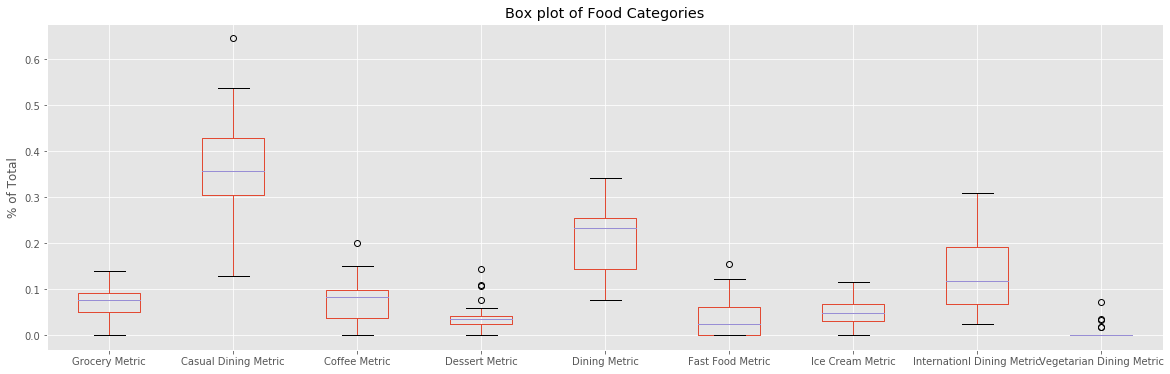

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

town_df[['Grocery Metric','Casual Dining Metric','Coffee Metric','Dessert Metric','Dining Metric','Fast Food Metric','Ice Cream Metric','Internationl Dining Metric','Vegetarian Dining Metric']].plot(kind='box', figsize=(20, 6))
plt.title('Box plot of Food Categories')
plt.ylabel('% of Total')
plt.show()



#### There are some obvious takeaways here. Casual dining is the most frequently occurring category. "Don't forget you are a poor college student" is a common parental mantra. The Dining category is the next step up in price and coming in second. Fast food was surprisingly low but there is an outlier that may be worth exploring further. International Dining was the third most frequent category albeit with a very broad range of values. Finally, Vegetarian Dining is non-existent with the exception of three outliers. More on that in the final report.

Matplotlib version:  3.1.1


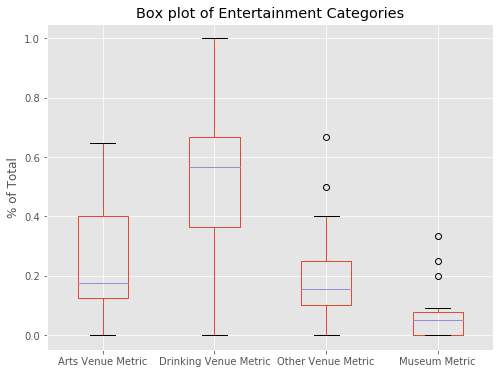

In [20]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

town_df[['Arts Venue Metric','Drinking Venue Metric','Other Venue Metric','Museum Metric']].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Entertainment Categories')
plt.ylabel('% of Total')
plt.show()

#### The most surprising category is the Drinking Venue. It ranges from zero to all venues. Read that again! Arts Venue also have a very significant range. The takeaway here is that within the entertainment venue category, college towns can differ significantly. More on this in the report.